In [19]:
# Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [4]:
ads = pd.read_csv('./AI_DATA/Social_Network_Ads.csv')
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
ads.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# Loadning the data
feature_cols = ['Age','Estimated Salary']
X = ads.iloc[:,2:4].values
y = ads.iloc[:,4].values

In [8]:
# Using the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')
model = clf.fit(X,y)

In [11]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 42.50
|   |--- feature_1 <= 90500.00
|   |   |--- feature_0 <= 36.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  36.50
|   |   |   |--- feature_1 <= 67500.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  67500.00
|   |   |   |   |--- feature_1 <= 83500.00
|   |   |   |   |   |--- feature_1 <= 70500.00
|   |   |   |   |   |   |--- feature_0 <= 39.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  39.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  70500.00
|   |   |   |   |   |   |--- feature_0 <= 41.50
|   |   |   |   |   |   |   |--- feature_0 <= 40.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 79500.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 77500.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 38.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  38.50
|   |   |   |   |   | 

### Plotting Decision Tree with Plot_tree

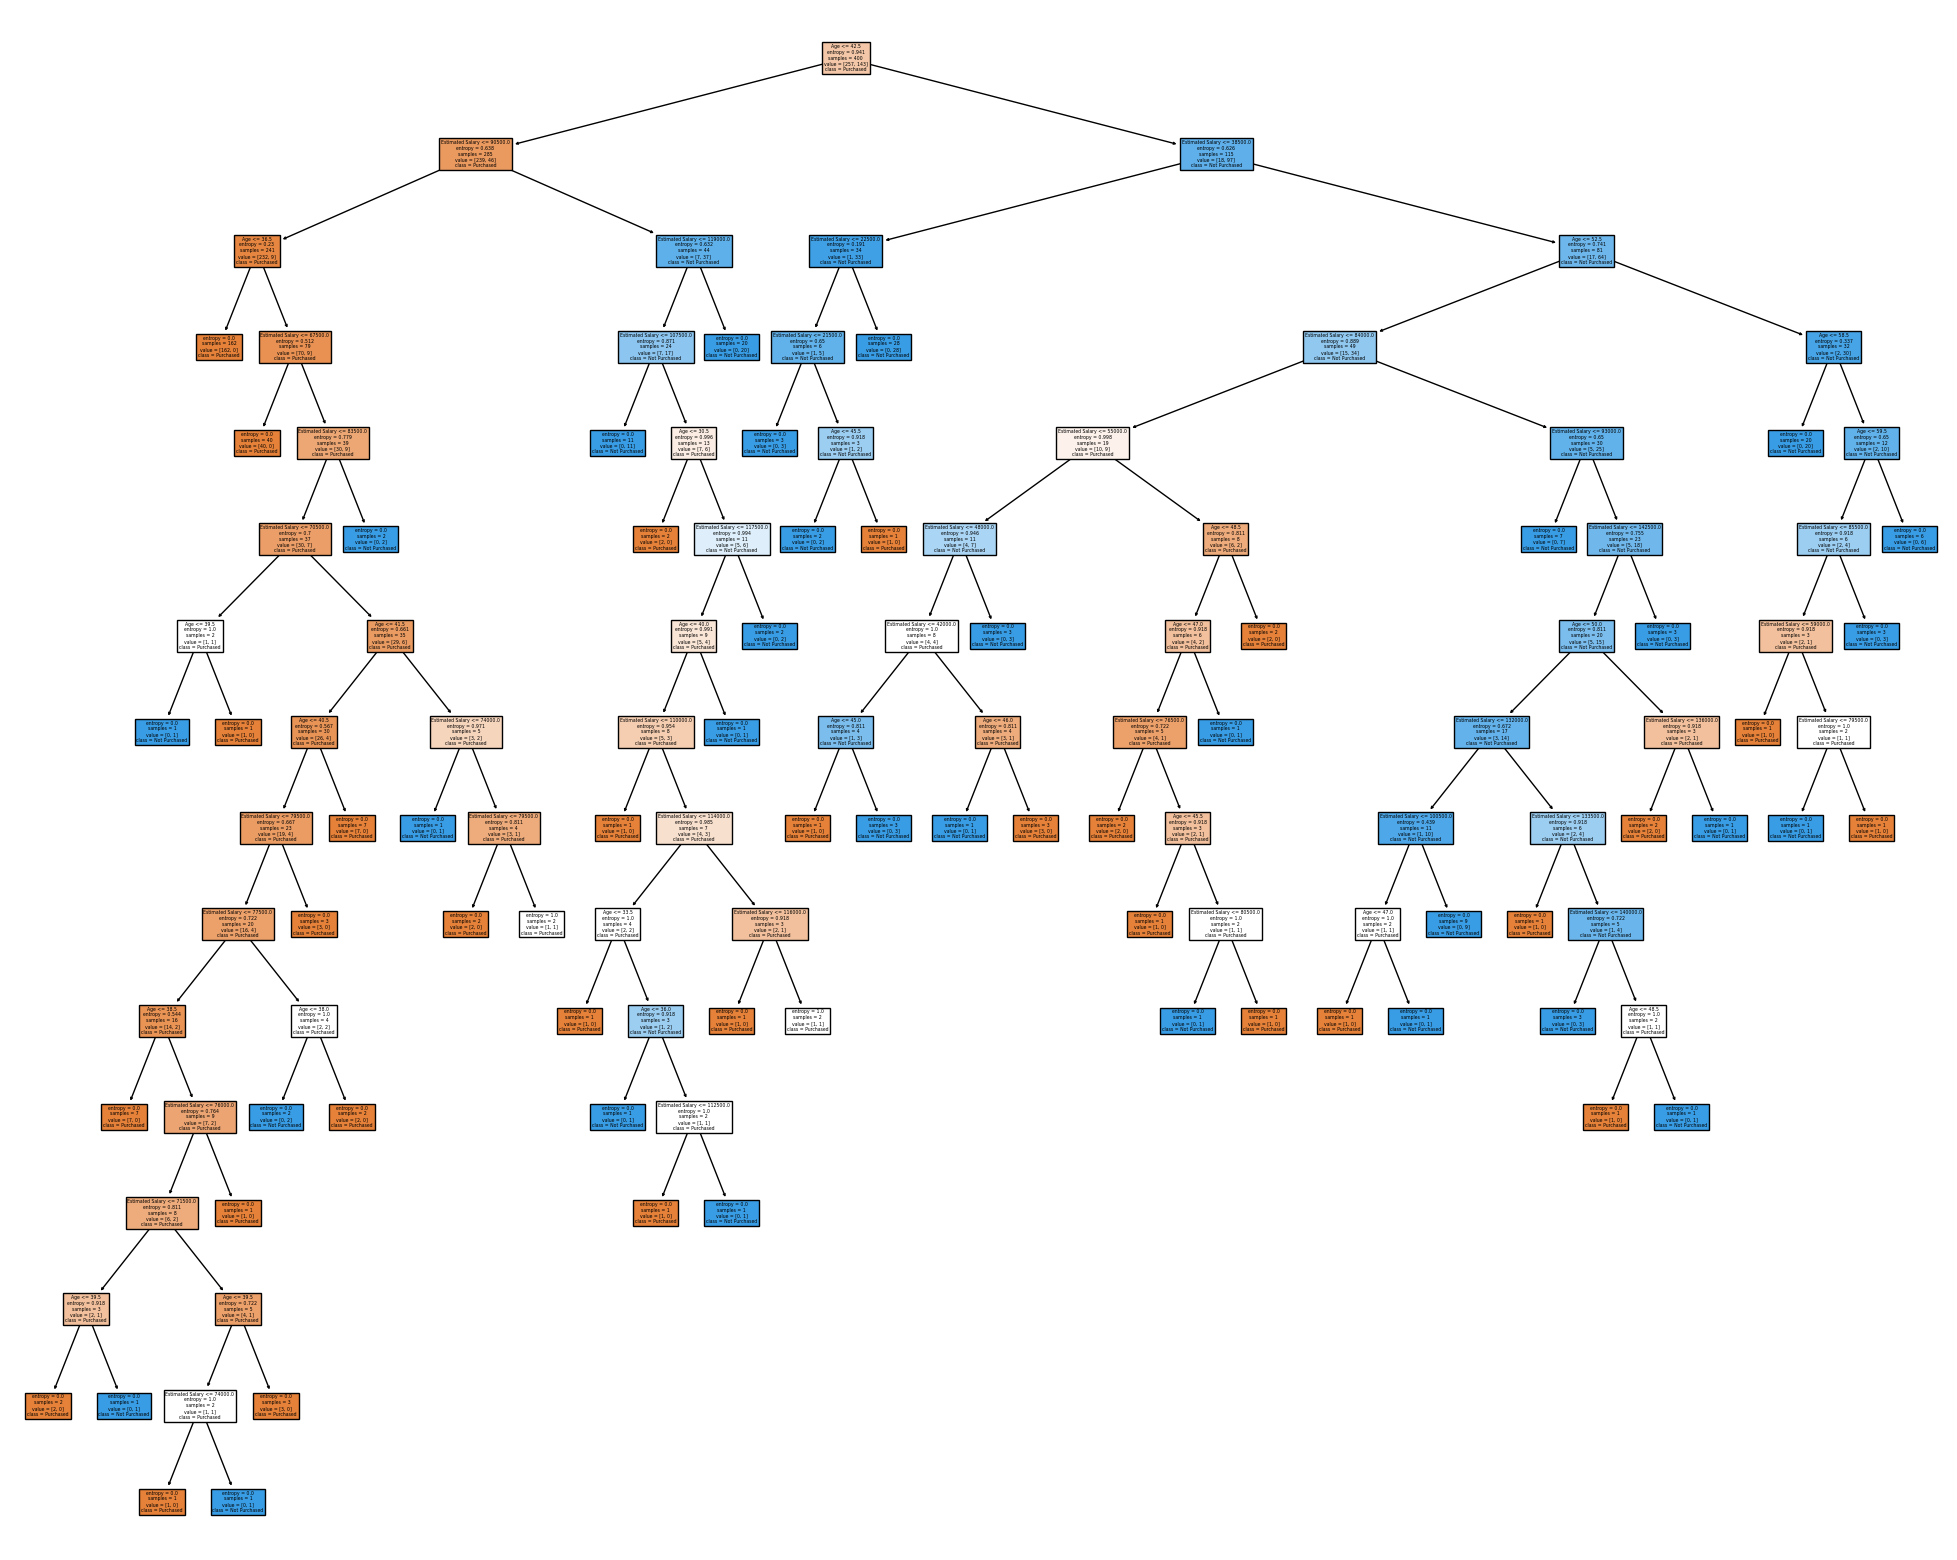

In [12]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,
                 feature_names=feature_cols,
                 class_names=['Purchased','Not Purchased'],
                 filled=True)

### Visualize Decision Tree with graphviz

In [18]:
import graphviz

social_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=feature_cols,
                                class_names=['Purchased','Not Purchased'],
                                filled=True)

graphviz.Source(social_data,format='png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Predict the Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

dt = DecisionTreeClassifier(max_depth=3)

dt_model = dt.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy Score: 91.67
